### Nessa análise, serão avalidas apenas algumas empresas dos setores:
- Energia
- Financeiro
- Exploração
- Materiais Básicos
- Bens industriais
- Saúde
- Consumo não cíclico

#### Seleção das bibliotecas e DataSets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
import plotly.express as px

In [67]:
import seaborn as sns

In [68]:
from datetime import timedelta

**Os dados podem estar inconsistentes em alguns casos, visto que principalmente o símbolo das ações alteram ao longo do tempo, 
assim como empresas deixam de existir, ou "entram" na bolsa em momentos diferentes**

In [51]:
columns = ['Date', 'Symbol', 'Close']
df = pd.read_csv('bovespa_stocks.csv', 
                  usecols=columns)
df.rename(columns={'Close': 'Valor'}, inplace=True)
df

Date  Symbol        Valor
0                2022-10-03  SMAB11     8.360000
1                2010-01-04   MMXM3  1599.174927
2                2010-01-05   MMXM3  1609.240479
3                2010-01-06   MMXM3  1680.958008
4                2010-01-07   MMXM3  1698.572876
...                     ...     ...          ...
894771  2022-12-16 00:00:00      G3     5.550000
894772  2022-12-16 00:00:00      I4     8.030000
894773  2022-12-16 00:00:00      L3     6.860000
894774  2022-12-16 00:00:00      P3    21.230000
894775  2022-12-16 00:00:00      T3     2.500000

[894776 rows x 3 columns]

**Os indicadores podem não ter os dados corretos, devido a auto fill para poder fazer as correlações**

In [52]:
df2 = pd.read_csv('economic_indicators.csv')
df2.ffill(inplace=True)
df2.bfill(inplace=True)
df2

Date  Taxa Selic  IPCA  IGP-M  INPC  Desemprego PNADC
0     2010-01-01        8.75  0.75   0.63  0.88               8.0
1     2010-01-02        8.75  0.75   0.63  0.88               8.0
2     2010-01-03        8.75  0.75   0.63  0.88               8.0
3     2010-01-04        8.75  0.75   0.63  0.88               8.0
4     2010-01-05        8.75  0.75   0.63  0.88               8.0
...          ...         ...   ...    ...   ...               ...
4807  2023-03-01       13.75  0.53  -0.06  0.46               8.1
4808  2023-03-02       13.75  0.53  -0.06  0.46               8.1
4809  2023-03-03       13.75  0.53  -0.06  0.46               8.1
4810  2023-03-04       13.75  0.53  -0.06  0.46               8.1
4811  2023-03-05       13.75  0.53  -0.06  0.46               8.1

[4812 rows x 6 columns]

### Manipulando os DataSets

**Definindo os setores e empresas de cada setor a setem analisadas**

In [41]:
setores = {
    'Energia': ['EGIE3', 'TAEE11', 'CMIG4'],
    'Financeiro': ['ITUB4', 'BBDC4', 'BBAS3'],
    'Exploração': ['PETR4', 'ENAT3', 'PRIO3'],
    'Materiais básicos': ['VALE5', 'KLBN11', 'BRKM5'],
    'Bens industriais': ['RAPT3', 'BRFS3', 'GOAU4'],
    'Saúde': ['FLRY3', 'AALR3', 'RADL3'],
    'Consumo não cíclico': ['MDIA3', 'JBSS3', 'SMTO3']
}

**Inserindo o setor das empresas escolhidas**

In [53]:
def nova_funcao(itens):
    for setor, empresas in setores.items():
        if itens in empresas:
            return setor
        else:
            continue

df['Setor'] = df['Symbol'].apply(nova_funcao)
df

Date  Symbol        Valor Setor
0                2022-10-03  SMAB11     8.360000  None
1                2010-01-04   MMXM3  1599.174927  None
2                2010-01-05   MMXM3  1609.240479  None
3                2010-01-06   MMXM3  1680.958008  None
4                2010-01-07   MMXM3  1698.572876  None
...                     ...     ...          ...   ...
894771  2022-12-16 00:00:00      G3     5.550000  None
894772  2022-12-16 00:00:00      I4     8.030000  None
894773  2022-12-16 00:00:00      L3     6.860000  None
894774  2022-12-16 00:00:00      P3    21.230000  None
894775  2022-12-16 00:00:00      T3     2.500000  None

[894776 rows x 4 columns]

**Limpando os dados desnecessários da tabela**

In [54]:
df.dropna(subset=['Setor'], inplace=True)
df

Date Symbol      Valor                Setor
9860             2010-01-04  JBSS3   9.670000  Consumo não cíclico
9861             2010-01-05  JBSS3   9.580000  Consumo não cíclico
9862             2010-01-06  JBSS3   9.730000  Consumo não cíclico
9863             2010-01-07  JBSS3   9.950000  Consumo não cíclico
9864             2010-01-08  JBSS3   9.960000  Consumo não cíclico
...                     ...    ...        ...                  ...
894697  2022-12-16 00:00:00  AALR3  21.160000                Saúde
894732  2022-12-16 00:00:00  BRFS3   6.850000     Bens industriais
894738  2022-12-16 00:00:00  EGIE3  36.990002              Energia
894747  2022-12-16 00:00:00  GOAU4  13.220000     Bens industriais
894752  2022-12-16 00:00:00  PRIO3  35.330002           Exploração

[64128 rows x 4 columns]

**Atualizando o formato das datas das tabelas**

In [55]:
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d', utc=True)
df

Date Symbol      Valor                Setor
9860   2010-01-04 00:00:00+00:00  JBSS3   9.670000  Consumo não cíclico
9861   2010-01-05 00:00:00+00:00  JBSS3   9.580000  Consumo não cíclico
9862   2010-01-06 00:00:00+00:00  JBSS3   9.730000  Consumo não cíclico
9863   2010-01-07 00:00:00+00:00  JBSS3   9.950000  Consumo não cíclico
9864   2010-01-08 00:00:00+00:00  JBSS3   9.960000  Consumo não cíclico
...                          ...    ...        ...                  ...
894697 2022-12-16 00:00:00+00:00  AALR3  21.160000                Saúde
894732 2022-12-16 00:00:00+00:00  BRFS3   6.850000     Bens industriais
894738 2022-12-16 00:00:00+00:00  EGIE3  36.990002              Energia
894747 2022-12-16 00:00:00+00:00  GOAU4  13.220000     Bens industriais
894752 2022-12-16 00:00:00+00:00  PRIO3  35.330002           Exploração

[64128 rows x 4 columns]

In [56]:
df2['Date'] = pd.to_datetime(df2.Date, format='%Y-%m-%d', utc=True)
df2

Date  Taxa Selic  IPCA  IGP-M  INPC  \
0    2010-01-01 00:00:00+00:00        8.75  0.75   0.63  0.88   
1    2010-01-02 00:00:00+00:00        8.75  0.75   0.63  0.88   
2    2010-01-03 00:00:00+00:00        8.75  0.75   0.63  0.88   
3    2010-01-04 00:00:00+00:00        8.75  0.75   0.63  0.88   
4    2010-01-05 00:00:00+00:00        8.75  0.75   0.63  0.88   
...                        ...         ...   ...    ...   ...   
4807 2023-03-01 00:00:00+00:00       13.75  0.53  -0.06  0.46   
4808 2023-03-02 00:00:00+00:00       13.75  0.53  -0.06  0.46   
4809 2023-03-03 00:00:00+00:00       13.75  0.53  -0.06  0.46   
4810 2023-03-04 00:00:00+00:00       13.75  0.53  -0.06  0.46   
4811 2023-03-05 00:00:00+00:00       13.75  0.53  -0.06  0.46   

      Desemprego PNADC  
0                  8.0  
1                  8.0  
2                  8.0  
3                  8.0  
4                  8.0  
...                ...  
4807               8.1  
4808               8.1  
4809               8.1  
4810               8.1  
4811               8.1  

[4812 rows x 6 columns]

**Juntando as tabelas de acordo com a data**

In [57]:
df = df.merge(df2, on='Date')
df.sort_values(by=['Date'], inplace=True)
df

Date Symbol      Valor                Setor  \
0     2010-01-04 00:00:00+00:00  JBSS3   9.670000  Consumo não cíclico   
16    2010-01-04 00:00:00+00:00  GOAU4  35.770000     Bens industriais   
15    2010-01-04 00:00:00+00:00  EGIE3  17.264000              Energia   
14    2010-01-04 00:00:00+00:00  BRFS3  22.895000     Bens industriais   
13    2010-01-04 00:00:00+00:00  VALE5  43.520000    Materiais básicos   
...                         ...    ...        ...                  ...   
63615 2022-12-16 00:00:00+00:00  PETR4  21.680000           Exploração   
63614 2022-12-16 00:00:00+00:00  JBSS3  20.700001  Consumo não cíclico   
63632 2022-12-16 00:00:00+00:00  GOAU4  13.220000     Bens industriais   
63622 2022-12-16 00:00:00+00:00  RADL3  22.059999                Saúde   
63633 2022-12-16 00:00:00+00:00  PRIO3  35.330002           Exploração   

       Taxa Selic  IPCA  IGP-M  INPC  Desemprego PNADC  
0            8.75  0.75   0.63  0.88               8.0  
16           8.75  0.75   0.63  0.88               8.0  
15           8.75  0.75   0.63  0.88               8.0  
14           8.75  0.75   0.63  0.88               8.0  
13           8.75  0.75   0.63  0.88               8.0  
...           ...   ...    ...   ...               ...  
63615       13.75  0.62   0.45  0.69               8.1  
63614       13.75  0.62   0.45  0.69               8.1  
63632       13.75  0.62   0.45  0.69               8.1  
63622       13.75  0.62   0.45  0.69               8.1  
63633       13.75  0.62   0.45  0.69               8.1  

[63634 rows x 9 columns]

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63634 entries, 0 to 63633
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Date              63634 non-null  datetime64[ns, UTC]
 1   Symbol            63634 non-null  object             
 2   Valor             63634 non-null  float64            
 3   Setor             63634 non-null  object             
 4   Taxa Selic        63634 non-null  float64            
 5   IPCA              63634 non-null  float64            
 6   IGP-M             63634 non-null  float64            
 7   INPC              63634 non-null  float64            
 8   Desemprego PNADC  63634 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), object(2)
memory usage: 4.9+ MB


**Funções que poderiam ser utilizadas para montar os gráficos**

In [34]:
def dubplots(setor):
    fig, axes = plt.subplots(nrows=1, ncols=len(setores[setor]))
    cont = 0
    for symbol in setores[setor]:
        df[df['Symbol']==symbol].plot(x='Date', y='Valor',
                                      ax=axes[cont],
                                      figsize=(20,5))
        axes[cont].set_title(symbol)
        cont += 1

In [58]:
def subplotlys(setor):
    annotations = []
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text=f'Setor - {setor}',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
    
    df2 = df[df['Setor'] == setor]
    fig = px.line(df2, x='Date', y='Valor', color='Symbol', )
    fig.update_layout(annotations=annotations)
    fig.show()

    # Esse código comentado apresenta subplots, porém não exibe todo o intervalo

    # fig = make_subplots(rows=1, cols=3, 
    #                     row_heights=[0.5], 
    #                     subplot_titles=tuple(setores[setor]))
    # for symbol in setores[setor]:
    #     fig.add_trace(go.Scatter(x = df2.Date.sort_values(), 
    #                              y = df2[df2['Symbol']==symbol]['Valor'],
    #                              name = symbol),
    #                   row = 1,
    #                   col = cont)
    #     cont += 1
        # fig.update_xave
    
    # fig.update_layout(height=400, width=1000)
    # fig.show()

### Multivariada

#### Correlação

**Correlação entre os indicadores econômicos e o valor das ações**

In [48]:
df.corr(numeric_only=True)

Valor  Taxa Selic      IPCA     IGP-M      INPC  \
Valor             1.000000   -0.148413 -0.010858  0.022882 -0.015783   
Taxa Selic       -0.148413    1.000000  0.030962 -0.416610  0.004626   
IPCA             -0.010858    0.030962  1.000000  0.402033  0.969638   
IGP-M             0.022882   -0.416610  0.402033  1.000000  0.442241   
INPC             -0.015783    0.004626  0.969638  0.442241  1.000000   
Desemprego PNADC  0.172027   -0.524133 -0.098685  0.296751 -0.083976   

                  Desemprego PNADC  
Valor                     0.172027  
Taxa Selic               -0.524133  
IPCA                     -0.098685  
IGP-M                     0.296751  
INPC                     -0.083976  
Desemprego PNADC          1.000000

**Visualização da tabela de correlação**

<Axes: >

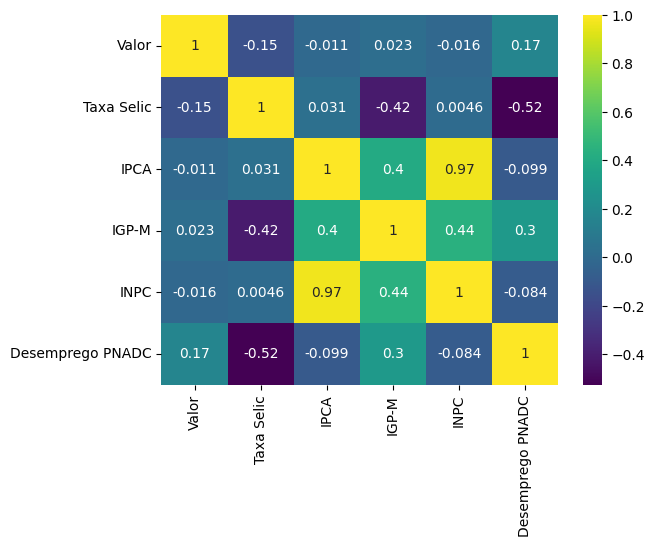

In [49]:
sns.heatmap(df.corr(numeric_only=True), cmap='viridis', annot=True)

### Gráficos por setor

#### Energia

In [59]:
subplotlys('Energia')

#### Financeiro

In [60]:
subplotlys('Financeiro')

#### Esploração

In [61]:
subplotlys('Exploração')

#### Materiais Básicos

In [62]:
subplotlys('Materiais básicos')

#### Bens Industriais

In [63]:
subplotlys('Bens industriais')

#### Saúde

In [64]:
subplotlys('Saúde')

#### Consumo não cíclico

In [65]:
subplotlys('Consumo não cíclico')

#### Gráfico geral

In [66]:
fig = px.line(df.sort_values(by=['Date']), x='Date', y='Valor', color='Symbol')
fig.show()

Através da análise dos gráficos, é possível ver que não existem muitos acontecimentos que afetam todos os setores simultaneamente
O único claramente visível é a pandemia que se iniciou em 2020.
Além disso, é notável que dentro de um mesmo setor, os valores de cada ação não tem muita relação, com exceção do setor financeiro,
aparenta que essas ações entram em alta e baixa ao mesmo tempo, são gráficos muito parecidos.

### Analise Univariada

**Para a análise univariada, escolhi utilizar o setor financeiro apenas, uma vez que ele parece ser mais consistente, e empresas variam de maneiras semelhantes**

In [69]:
def cria_subset(setor):
    novo_df = pd.DataFrame({})
    for Symbol in setores[setor]:
        df2 = df.loc[df['Symbol'] == Symbol, ['Date', 'Symbol', 'Valor', 'Setor']]
        novo_df = pd.concat([novo_df, df2])
    return novo_df

In [70]:
df_financeiro = cria_subset('Financeiro')
df_financeiro

Date Symbol      Valor       Setor
3     2010-01-04 00:00:00+00:00  ITUB4  18.268333  Financeiro
20    2010-01-05 00:00:00+00:00  ITUB4  18.386723  Financeiro
37    2010-01-06 00:00:00+00:00  ITUB4  18.227352  Financeiro
54    2010-01-07 00:00:00+00:00  ITUB4  18.040663  Financeiro
71    2010-01-08 00:00:00+00:00  ITUB4  17.767456  Financeiro
...                         ...    ...        ...         ...
63543 2022-12-12 00:00:00+00:00  BBAS3  33.570000  Financeiro
63563 2022-12-13 00:00:00+00:00  BBAS3  33.020000  Financeiro
63583 2022-12-14 00:00:00+00:00  BBAS3  30.670000  Financeiro
63603 2022-12-15 00:00:00+00:00  BBAS3  31.620001  Financeiro
63623 2022-12-16 00:00:00+00:00  BBAS3  32.430000  Financeiro

[9680 rows x 4 columns]

In [72]:
def avalia_intervalo(setor):
    datas = {}
    for symbol in setores[setor]:
        novo_df = df_financeiro[df_financeiro['Symbol'] == symbol]
        datas[symbol] = set()
        for i in novo_df['Date']:
            j = i + timedelta(10)
            intervalo = novo_df[novo_df['Date'].between(i, j)]
            
            max_valor = intervalo['Valor'].max()
            min_valor = intervalo['Valor'].min()

            f1 = max_valor >= 1.10 * min_valor
            if f1:
                datas[symbol].add(intervalo['Date'].median().strftime('%m-%Y'))
    return datas

In [73]:
datas = avalia_intervalo('Financeiro')

**Através da próxima célula, é possível verificar quais foram os meses em que tiveram variações de 10% ou mais nas tres ações em um período de apenas 10 dias,
É possível concluir e verificar quais foram os cenários de cada um desses dias, para traçar acontecimentos que têm impacto positivo ou negativo nas ações**

In [75]:
datas['ITUB4'].intersection(datas['BBAS3']).intersection(datas['BBDC4'])

{'01-2018',
 '02-2016',
 '02-2021',
 '03-2014',
 '03-2015',
 '03-2016',
 '03-2019',
 '03-2020',
 '04-2016',
 '04-2020',
 '05-2016',
 '05-2017',
 '05-2020',
 '06-2014',
 '06-2018',
 '06-2020',
 '07-2010',
 '07-2011',
 '07-2012',
 '07-2015',
 '07-2016',
 '08-2011',
 '08-2015',
 '08-2022',
 '09-2011',
 '09-2014',
 '09-2015',
 '09-2018',
 '10-2014',
 '10-2015',
 '10-2018',
 '10-2020',
 '11-2014',
 '11-2016',
 '11-2020',
 '11-2022',
 '12-2014',
 '12-2020',
 '12-2022'}